# New exploration on titanic dataset features to try a simple deep learning model

## Quick discovery

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
from matplotlib import pyplot as plt

df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')
df_all = pd.concat([df_train, df_test], ignore_index=True, axis=0)
df_all.name = 'All Set'
df_all.sample(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S
287,288,0.0,3,"Naidenoff, Mr. Penko",male,22.0,0,0,349206,7.8958,NaN,S
895,896,NaN,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
559,560,1.0,3,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",female,36.0,1,0,345572,17.4000,NaN,S
642,643,0.0,3,"Skoog, Miss. Margit Elizabeth",female,2.0,3,2,347088,27.9000,NaN,S


In [3]:
df_all.info()
df_all.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [4]:
df_all.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


array([[<AxesSubplot: title={'center': 'PassengerId'}>,
        <AxesSubplot: title={'center': 'Survived'}>,
        <AxesSubplot: title={'center': 'Pclass'}>],
       [<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'SibSp'}>,
        <AxesSubplot: title={'center': 'Parch'}>],
       [<AxesSubplot: title={'center': 'Fare'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

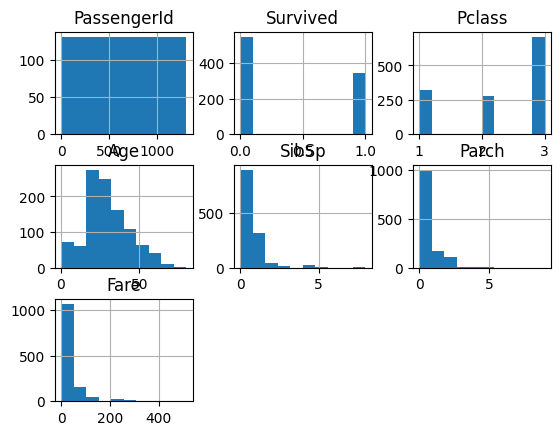

In [5]:
df_all.hist()

array([[<AxesSubplot: xlabel='PassengerId', ylabel='PassengerId'>,
        <AxesSubplot: xlabel='Survived', ylabel='PassengerId'>,
        <AxesSubplot: xlabel='Pclass', ylabel='PassengerId'>,
        <AxesSubplot: xlabel='Age', ylabel='PassengerId'>,
        <AxesSubplot: xlabel='SibSp', ylabel='PassengerId'>,
        <AxesSubplot: xlabel='Parch', ylabel='PassengerId'>,
        <AxesSubplot: xlabel='Fare', ylabel='PassengerId'>],
       [<AxesSubplot: xlabel='PassengerId', ylabel='Survived'>,
        <AxesSubplot: xlabel='Survived', ylabel='Survived'>,
        <AxesSubplot: xlabel='Pclass', ylabel='Survived'>,
        <AxesSubplot: xlabel='Age', ylabel='Survived'>,
        <AxesSubplot: xlabel='SibSp', ylabel='Survived'>,
        <AxesSubplot: xlabel='Parch', ylabel='Survived'>,
        <AxesSubplot: xlabel='Fare', ylabel='Survived'>],
       [<AxesSubplot: xlabel='PassengerId', ylabel='Pclass'>,
        <AxesSubplot: xlabel='Survived', ylabel='Pclass'>,
        <AxesSubplot: xlabel='

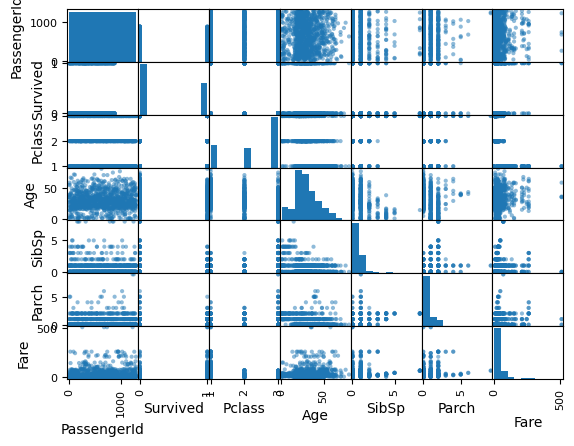

In [6]:
pd.plotting.scatter_matrix(df_all)

In [7]:
df_all.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [8]:
df_all[df_all['Embarked'].isna()]
# from google search PassengerId 62 and PassengerId 830 embarked from Southampton 
df_all[df_all['PassengerId'] == 62]
df_all[df_all['PassengerId'] == 830]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [9]:
df_all[df_all['Fare'].isna()]
# Intituively fare is linked with PClass, Embarked, Cabin, SibSp, Parch 
# one case only PassengerId 1044
# Cabin not usable due to too many missing values
df_all[df_all['PassengerId'] == 1044]
fare = df_all[(df_all['Pclass'] == 3) & (df_all['Embarked'].str.contains('S')) & (df_all['SibSp'] == 0) & (df_all['Parch'] == 0)]
print(f"{fare['Fare'].mean()} {fare['Fare'].mode().item()}")

9.593713003095974 8.05


In [10]:
df_all[df_all['Age'].isna()]
# SibSp and Parch should tell us if the person is a family member or a child
# But taking the lazy approach: we just take the medium for females and males (2 years average gap)
age = df_all[(~df_all['Age'].isna()) & (df_all['Sex'].str.contains("female"))]
print(f"{age['Age'].mean()} {age['Age'].mode().item()}")

28.68708762886598 22.0


In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

df_dt_y = df_train['Survived']
df_dt_x = df_train.drop(['Survived'], axis = 1)
df_dt_x.head()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df_dt_x.fillna(method="ffill", inplace=True)
df_dt_x = df_dt_x.drop(['Name', 'PassengerId', 'Cabin', 'Ticket'], axis = 1)
df_dt_x = pd.get_dummies(df_dt_x, columns = ['Sex', 'Pclass', 'Embarked'])
df_dt_x.head()

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0
2,26.0,0,0,7.9250,1,0,0,0,1,0,0,1
3,35.0,1,0,53.1000,1,0,1,0,0,0,0,1
4,35.0,0,0,8.0500,0,1,0,0,1,0,0,1


[Text(0.4, 0.8333333333333334, 'Sex_female <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(0.2, 0.5, 'gini = 0.306\nsamples = 577\nvalue = [468, 109]'),
 Text(0.6, 0.5, 'Pclass_3 <= 0.5\ngini = 0.383\nsamples = 314\nvalue = [81, 233]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.1\nsamples = 170\nvalue = [9, 161]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.5\nsamples = 144\nvalue = [72, 72]')]

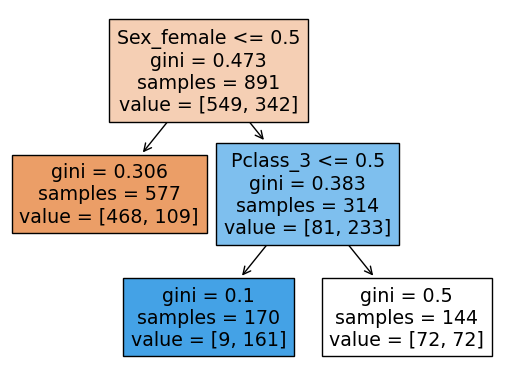

In [13]:
clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
clf.fit(df_dt_x, df_dt_y)
tree.plot_tree(clf,feature_names=df_dt_x.columns, filled=True)

In [14]:
df_all.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [15]:
df_all['Pclass'].value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

In [16]:
df_all['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [17]:
df_all[df_all['Fare'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


<AxesSubplot: >

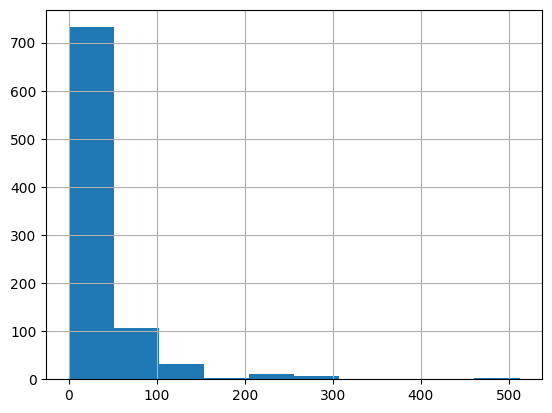

In [18]:
df_train['Fare'].hist()

* feature engineering
*** missing values: we add the most frequent value
*** categorical columns: we one hot encode them
*** numerical columns: we divide by max
*** Cabin column: we remove (too much missing values)

In [19]:
def prepare_features_basic(data):
  # missing values
  data.loc[data['Age'].isna(), 'Age'] = data['Age'].mode()[0].item()
  data.loc[data['Embarked'].isna(), 'Embarked'] = data['Embarked'].mode().item()
  data['Fare'].fillna(data['Fare'].mode().item())
  # Cabin: no need as we do delete it
  # categorical
  data = pd.get_dummies(data, columns = ['Sex', 'Pclass', 'Embarked'])
  # useless columns
  data = data.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis = 1)
  # numerical
  data['Age'] /= data['Age'].max() 
  data['SibSp'] /= data['SibSp'].max()
  data['Parch'] /= data['Parch'].max()
  data['Fare'] = np.log1p(data['Fare'])
  data['Fare'] /= data['Fare'].max()
  return data

# More advanced feature engineering: more precise filling of missing values

In [20]:
def prepare_features_initial(data):
  # missing values
  f_age_mean = data.loc[(~data['Age'].isna()) & (data['Sex'].str.contains("female")), 'Age'].mean()
  data.loc[(data['Age'].isna()) & (data['Sex'].str.contains("female")), 'Age'] = f_age_mean  
  m_age_mean = data.loc[(~data['Age'].isna()) & (data['Sex'].str.contains("male")), 'Age'].mean()
  data.loc[(data['Age'].isna()) & (data['Sex'].str.contains("male")), 'Age'] = m_age_mean  
  data['Age'] = data['Age'].astype(float)
  
  data.loc[data['PassengerId'] == 62, 'Embarked'] = 'S'
  data.loc[data['PassengerId'] == 830, 'Embarked'] = 'S'
  
  r = data.loc[(data['Pclass'] == 3) & (data['Embarked'].str.contains('S')) & (data['SibSp'] == 0) & (data['Parch'] == 0), 'Fare'].mode().item()
  data.loc[data['PassengerId'] == 1044, 'Fare'] = r
  # Cabin: no need as we do delete it
  # categorical
  data = pd.get_dummies(data, columns = ['Sex', 'Pclass', 'Embarked'])
  # useless columns
  data = data.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis = 1)
  # numerical
  data['Age'] /= data['Age'].max() 
  data['SibSp'] /= data['SibSp'].max()
  data['Parch'] /= data['Parch'].max()
  data['Fare'] = np.log1p(data['Fare'])
  data['Fare'] /= data['Fare'].max()
  return data

In [21]:
def prepare_features_medium(data):
  # missing values
  f_age_mean = data.loc[(~data['Age'].isna()) & (data['Sex'].str.contains("female")), 'Age'].mean()
  data.loc[(data['Age'].isna()) & (data['Sex'].str.contains("female")), 'Age'] = f_age_mean  
  m_age_mean = data.loc[(~data['Age'].isna()) & (data['Sex'].str.contains("male")), 'Age'].mean()
  data.loc[(data['Age'].isna()) & (data['Sex'].str.contains("male")), 'Age'] = m_age_mean  
  data['Age'] = data['Age'].astype(float)
  
  data.loc[data['PassengerId'] == 62, 'Embarked'] = 'S'
  data.loc[data['PassengerId'] == 830, 'Embarked'] = 'S'
  
  r = data.loc[(data['Pclass'] == 3) & (data['Embarked'].str.contains('S')) & (data['SibSp'] == 0) & (data['Parch'] == 0), 'Fare'].mode().item()
  data.loc[data['PassengerId'] == 1044, 'Fare'] = r
  # Cabin: no need as we do delete it

  # we combine SibSp and Parch to measure the family size including the passenger
  data['Family'] = 1 + data['SibSp'] + data['Parch']
  # categorical
  data = pd.get_dummies(data, columns = ['Sex', 'Pclass', 'Embarked'])
  # useless columns
  data = data.drop(['Cabin', 'Name', 'Ticket', 'PassengerId', 'SibSp', 'Parch'], axis = 1)
  # numerical
  data['Age'] /= data['Age'].max() 
  data['Family'] /= data['Family'].max()
  data['Fare'] = np.log1p(data['Fare'])
  data['Fare'] /= data['Fare'].max()
  return data

In [22]:
df_all.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [23]:
df_all.loc[(~df_all['Age'].isna()) & (df_all['Sex'].str.contains("male")), 'Age']

0       22.0
1       38.0
2       26.0
3       35.0
4       35.0
        ... 
1300     3.0
1302    37.0
1303    28.0
1305    39.0
1306    38.5
Name: Age, Length: 1046, dtype: float64

In [24]:
df_all.loc[(df_all['Age'].isna()) & (df_all['Sex'].str.contains("female")), 'Age']

19     NaN
28     NaN
31     NaN
32     NaN
47     NaN
        ..
1195   NaN
1256   NaN
1273   NaN
1299   NaN
1301   NaN
Name: Age, Length: 78, dtype: float64

In [25]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [26]:
#df_all[df_all['Age'].isna()]
#df_all['Age'] = df_all['Age'].astype('float')
#df_all.dtypes
df_all = prepare_features_medium(df_all)

In [27]:
df_all.head(20)

,Survived,Age,Fare,Family,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.275000,0.338125,0.181818,0,1,0,0,1,0,0,1
1,1.0,0.475000,0.685892,0.181818,1,0,1,0,0,1,0,0
2,1.0,0.325000,0.350727,0.090909,1,0,0,0,1,0,0,1
3,1.0,0.437500,0.639463,0.181818,1,0,1,0,0,0,0,1
4,0.0,0.437500,0.352955,0.090909,0,1,0,0,1,0,0,1
5,0.0,0.372478,0.360026,0.090909,0,1,0,0,1,0,1,0
6,0.0,0.675000,0.635755,0.090909,0,1,1,0,0,0,0,1
7,0.0,0.025000,0.495832,0.454545,0,1,0,0,1,0,0,1
8,1.0,0.337500,0.399934,0.272727,1,0,0,0,1,0,0,1
9,1.0,0.175000,0.550603,0.181818,1,0,0,1,0,1,0,0
